#### - PROBLEM STATEMENT

Here, we are trying to perform an Exploratory Data Analytics to find the most affected countries,states and city. Also,to find the hot zone for terrorism. Weapons that they used and so on.
#### 

### Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.rcParams['figure.figsize']=[15,8]

In [12]:
terror = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')
print("The first five observations in the dataset :")
terror.head()

C:\Users\Anirudh MV\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The first five observations in the dataset :


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
print("The last five observations in the dataset :")
terror.tail()

The last five observations in the dataset :


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


checking the shape of the data

In [14]:
terror.shape

(181691, 135)

#### we can see that there are 181691 observations and 135 attributes in our dataset.

In [15]:
#checking for the data types in our dataset

In [16]:
terror.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

#### Since there are around 135 columns it is difficult to go through all and find if all the data types are identified correctly.

In [17]:
terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


#### from the above output, we can infer that :
there are few missing values since the count values for each of column is different.
5 point summary(min,25%,50%,75%,max), mean and Standard devation for different numerical variables can be seen.

In [19]:
# for categorical data

In [20]:
terror.describe(include=object)

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181257,55495,115562,29011,181691,...,324,3305,514,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36674,44109,112492,5,9,...,143,217,387,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,...,27,687,36,3606,1607,205,134,139,78002,80


#### from the above output, we can infer that :
there are few missing values since the count values for each of column is different.
there are 12 different regions and Middle East and North Africa has the highest frequency with count 50474.
most of the approxdate is on September 18-24 2016.
as of now, country Iraq has the highest terrorism rate with count of 24636

### Data Cleaning

In [21]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','attacktype1_txt':'Attacktype','targtype1_txt':'Target_type','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

### Checking for null values and treating them.

In [22]:
Total = terror.isnull().sum().sort_values(ascending=False) 

Percent = (terror.isnull().sum()*100/terror.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
...,...,...
attacktype1,0,0.000000
suicide,0,0.000000
success,0,0.000000
crit3,0,0.000000


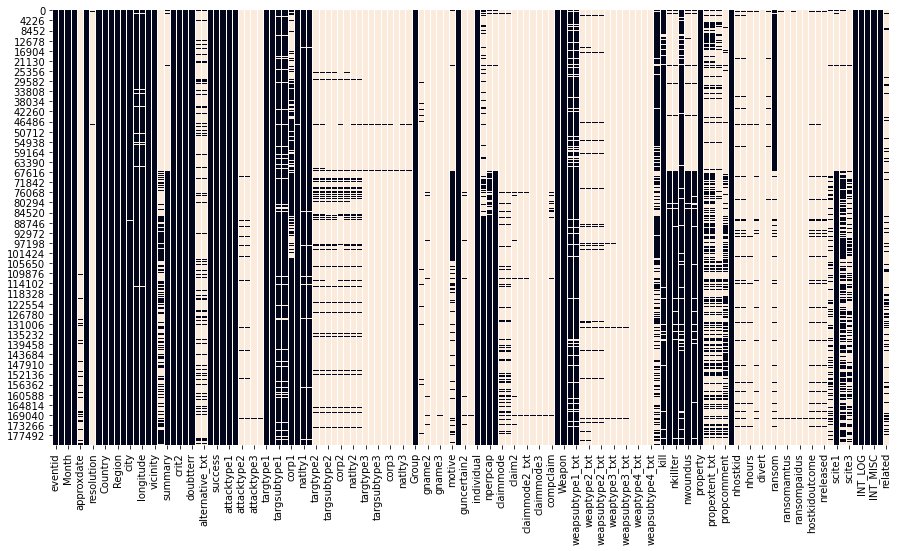

In [23]:
sns.heatmap(terror.isnull(), cbar=False)
plt.show()

#### Now since there are many columns, also if the percentage of missing values is more than 80 %, let us eliminate that column as it wont help our analysis since most of the values are unknown.

In [24]:
#dropping columns having more than 80% of missing values since they are insignificant

In [25]:
for idx, x in missing_data['Percentage of Missing Values'].iteritems():
    if x  > 80 : 
        terror=terror.drop(idx,1)

In [27]:
## now that we have dropped the columns that contains, missing values more than 80 %,
##let us see how many columns and there percentage of missing values.

In [28]:
Total = terror.isnull().sum().sort_values(ascending=False) 


Percent = (terror.isnull().sum()*100/terror.isnull().count()).sort_values(ascending=False) 


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
propvalue,142702,78.541039
scite3,138175,76.049447
motive,131130,72.171984
location,126196,69.456385
propcomment,123732,68.100236
...,...,...
Attacktype,0,0.000000
attacktype1,0,0.000000
suicide,0,0.000000
success,0,0.000000


#### we see that most of the columns have been dropped indicating that our data had more unknown values, now we shall try filling the missing values of remaining columns.

In [29]:
missing_data['Type'] = terror[missing_data.index].dtypes

In [30]:
missing_data

,Total,Percentage of Missing Values,Type
propvalue,142702,78.541039,float64
scite3,138175,76.049447,object
motive,131130,72.171984,object
location,126196,69.456385,object
propcomment,123732,68.100236,object
...,...,...,...
Attacktype,0,0.000000,object
attacktype1,0,0.000000,int64
suicide,0,0.000000,int64
success,0,0.000000,int64


In [31]:
terror[terror['State']=='Unknown']

,eventid,Year,Month,day,extended,country,Country,region,Region,State,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
16,197001110001,1970,1,11,0,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,0.0,0.0,NaN,NaN,NaN,PGIS,0,1,1,1
103,197003030001,1970,3,3,0,185,Spain,8,Western Europe,Unknown,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,0,1
132,197003140001,1970,3,14,1,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
165,197004000001,1970,4,0,1,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,1.0,0.0,NaN,NaN,NaN,PGIS,0,1,1,1
210,197004210001,1970,4,21,0,160,Philippines,5,Southeast Asia,Unknown,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180885,201711280046,2017,11,28,1,37,Cameroon,11,Sub-Saharan Africa,Unknown,...,1.0,0.0,"""Military Launches Operation to Free Hostages,...",NaN,NaN,START Primary Collection,-9,-9,0,-9
181112,201712060033,2017,12,11,0,95,Iraq,10,Middle East & North Africa,Unknown,...,0.0,NaN,"""Section of Iraq-Turkey pipeline cleared from ...",NaN,NaN,START Primary Collection,0,1,0,1
181300,201712130030,2017,12,13,0,209,Turkey,10,Middle East & North Africa,Unknown,...,0.0,NaN,"""Turkey: Civilian succumbs to injuries after P...",NaN,NaN,START Primary Collection,0,0,0,0
181351,201712160030,2017,12,16,1,200,Syria,10,Middle East & North Africa,Unknown,...,1.0,0.0,"""Mother, held in Syria after trying to bring s...","""Jolly Bimbachi, mother held by al-Qaeda affil...","""Syria raids kill 30 near Damascus as war of w...",START Primary Collection,-9,-9,1,1


#### we see that there are unknown values in State column and maybe in other columns as well. Hence, we shall replace unknown with nan and then do the missing value treatment

In [32]:
terror.replace(to_replace ="Unknown",value =np.nan,inplace=True)

In [34]:
Total = terror.isnull().sum().sort_values(ascending=False)

Percent = (terror.isnull().sum()*100/terror.isnull().count()).sort_values(ascending=False) 

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data['Type'] = terror[missing_data.index].dtypes

missing_data

,Total,Percentage of Missing Values,Type
motive,146019,80.366666,object
propvalue,142702,78.541039,float64
scite3,138175,76.049447,object
propextent_txt,137472,75.662526,object
location,126212,69.465191,object
...,...,...,...
property,0,0.000000,int64
dbsource,0,0.000000,object
INT_LOG,0,0.000000,int64
INT_IDEO,0,0.000000,int64


In [35]:
### Seperating object datatype and other datatypes.

In [36]:
obj=[]
obj_1=[]
for idx, x in missing_data['Type'].iteritems():

    idx=str(idx)
    if x=='object' :
        obj.append(idx)
    else:
        obj_1.append(idx)
print('object type',obj)   
print('numerical type',obj_1)

object type ['motive', 'scite3', 'propextent_txt', 'location', 'propcomment', 'scite2', 'Group', 'weapdetail', 'scite1', 'summary', 'corp1', 'weapsubtype1_txt', 'Weapon', 'targsubtype1_txt', 'city', 'Attacktype', 'target1', 'Target_type', 'State', 'natlty1_txt', 'Country', 'Region', 'dbsource']
numerical type ['propvalue', 'propextent', 'ransom', 'nperps', 'nperpcap', 'nwoundte', 'nkillter', 'claimed', 'nwoundus', 'nkillus', 'weapsubtype1', 'Wound', 'targsubtype1', 'kill', 'longitude', 'latitude', 'natlty1', 'guncertain1', 'ishostkid', 'specificity', 'multiple', 'doubtterr', 'region', 'extended', 'day', 'Month', 'Year', 'vicinity', 'country', 'INT_ANY', 'crit1', 'crit2', 'crit3', 'success', 'suicide', 'attacktype1', 'targtype1', 'INT_MISC', 'individual', 'weaptype1', 'property', 'INT_LOG', 'INT_IDEO', 'eventid']


In [37]:
# filling the nan values with the mode of each categorical column because that is the most repeated value

In [38]:
terror[obj]=terror[obj].fillna(terror.mode().iloc[0])

In [39]:
# Checking for outliers of numerical columns to handle missing values using a boxplot

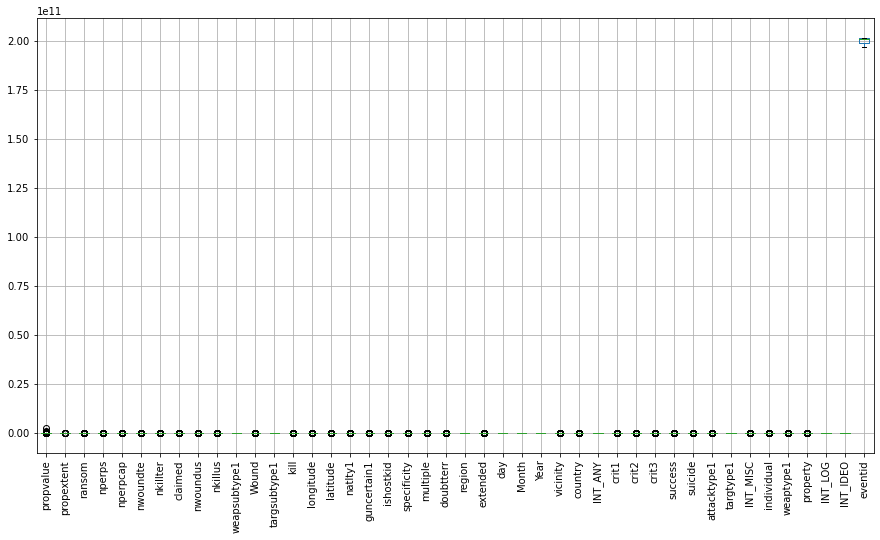

In [40]:
terror[obj_1].boxplot()
plt.xticks(rotation=90)
plt.show()

#### since nothing is clear with this boxplot, we shall try plotting them individually

In [41]:
df_num = terror.select_dtypes(include='number')

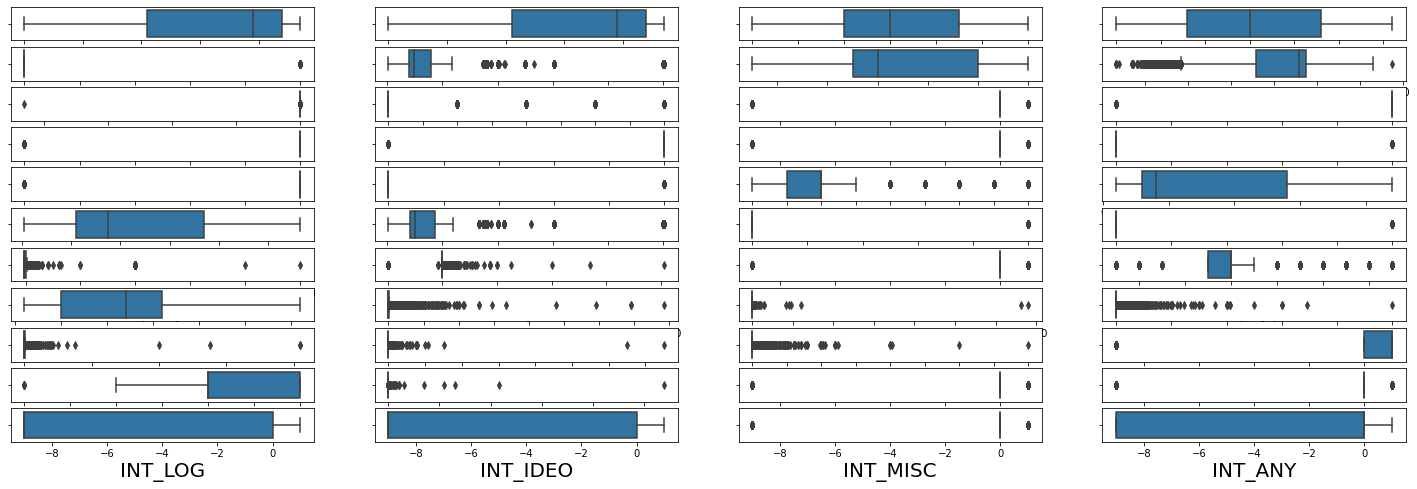

In [42]:
fig, ax = plt.subplots(11, 4, figsize=(25, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

#### From the above boxplot, it can be seen that most of the numerical columns has outliers, hence we can fill our numerical cols with mean of that column.

In [43]:
terror[obj_1]=terror[obj_1].fillna(terror.median())

In [44]:
Total = terror.isnull().sum().sort_values(ascending=False) 

Percent = (terror.isnull().sum()*100/terror.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
INT_ANY,0,0.0
summary,0,0.0
corp1,0,0.0
targsubtype1_txt,0,0.0
targsubtype1,0,0.0
...,...,...
nperps,0,0.0
individual,0,0.0
guncertain1,0,0.0
motive,0,0.0


#### After handling null values we can see from the above table that there are no null values present, however we can visualize the same using the heatmap.

In [47]:
terror[terror['State']=='Unknown']

,eventid,Year,Month,day,extended,country,Country,region,Region,State,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY


#### now we can also infer that unknown values are also replace with mode.

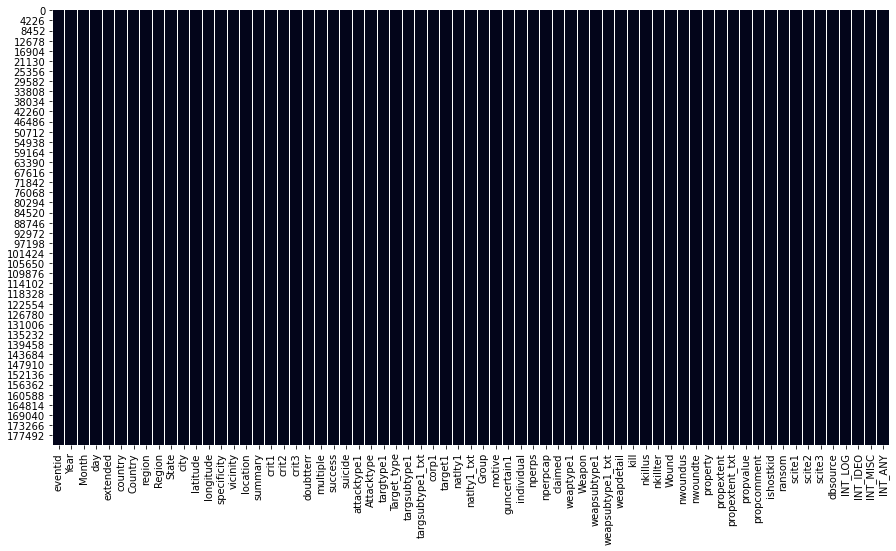

In [48]:
sns.heatmap(terror.isnull(), cbar=False)
plt.show()

#### heatmap confirms that there are no missing values

### EDA

In [49]:
#distribution of each numeric variables

eventid          -0.619155
Year             -0.619067
Month             0.006750
day               0.019065
extended          4.370397
country           3.152161
region           -0.348260
latitude         -0.999909
longitude      -426.252222
specificity       2.159575
vicinity         -3.789433
crit1            -9.175880
crit2           -11.907267
crit3            -2.277071
doubtterr        -3.074592
multiple          2.101954
success          -2.486370
suicide           4.942699
attacktype1       1.546775
targtype1         0.459817
targsubtype1      0.495169
natlty1           3.329175
guncertain1       3.064849
individual       18.329873
nperps           68.986928
nperpcap         -8.782324
claimed          -8.864494
weaptype1         2.243913
weapsubtype1      0.208861
kill             55.668242
nkillus         282.704386
nkillter         52.735293
Wound           182.948092
nwoundus        263.518411
nwoundte         63.961527
property         -2.272144
propextent        2.116404
p

<Figure size 1800x720 with 0 Axes>

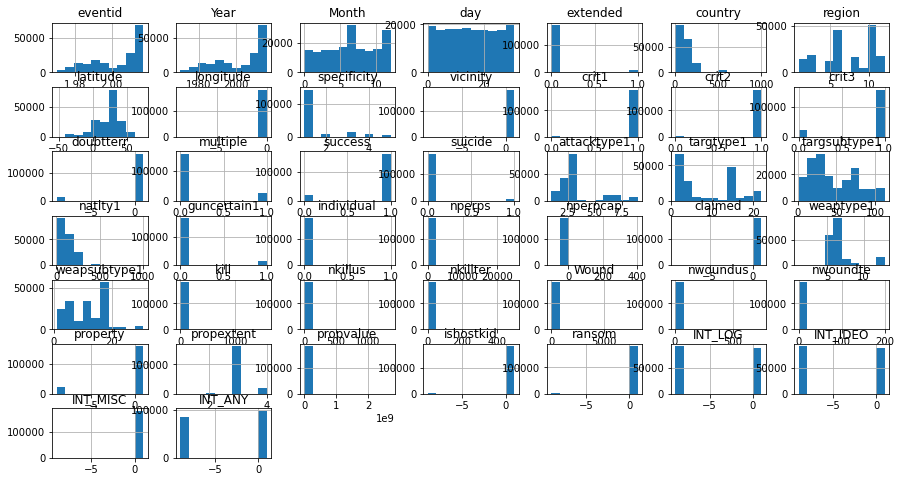

In [50]:
plt.figure(figsize=(25,10))
terror.hist()
print(terror.skew())
plt.show()

#### using this plot we can say which variables are right skewed, left skewed and normally distributed.from the above plot, we can say that there are few variables which are right skewed, few which are left skewed. However, there are variables which is normally distributed like Month,day,INT_LOG,INT_IDEO.

In [51]:
### Checking for correlation between variables

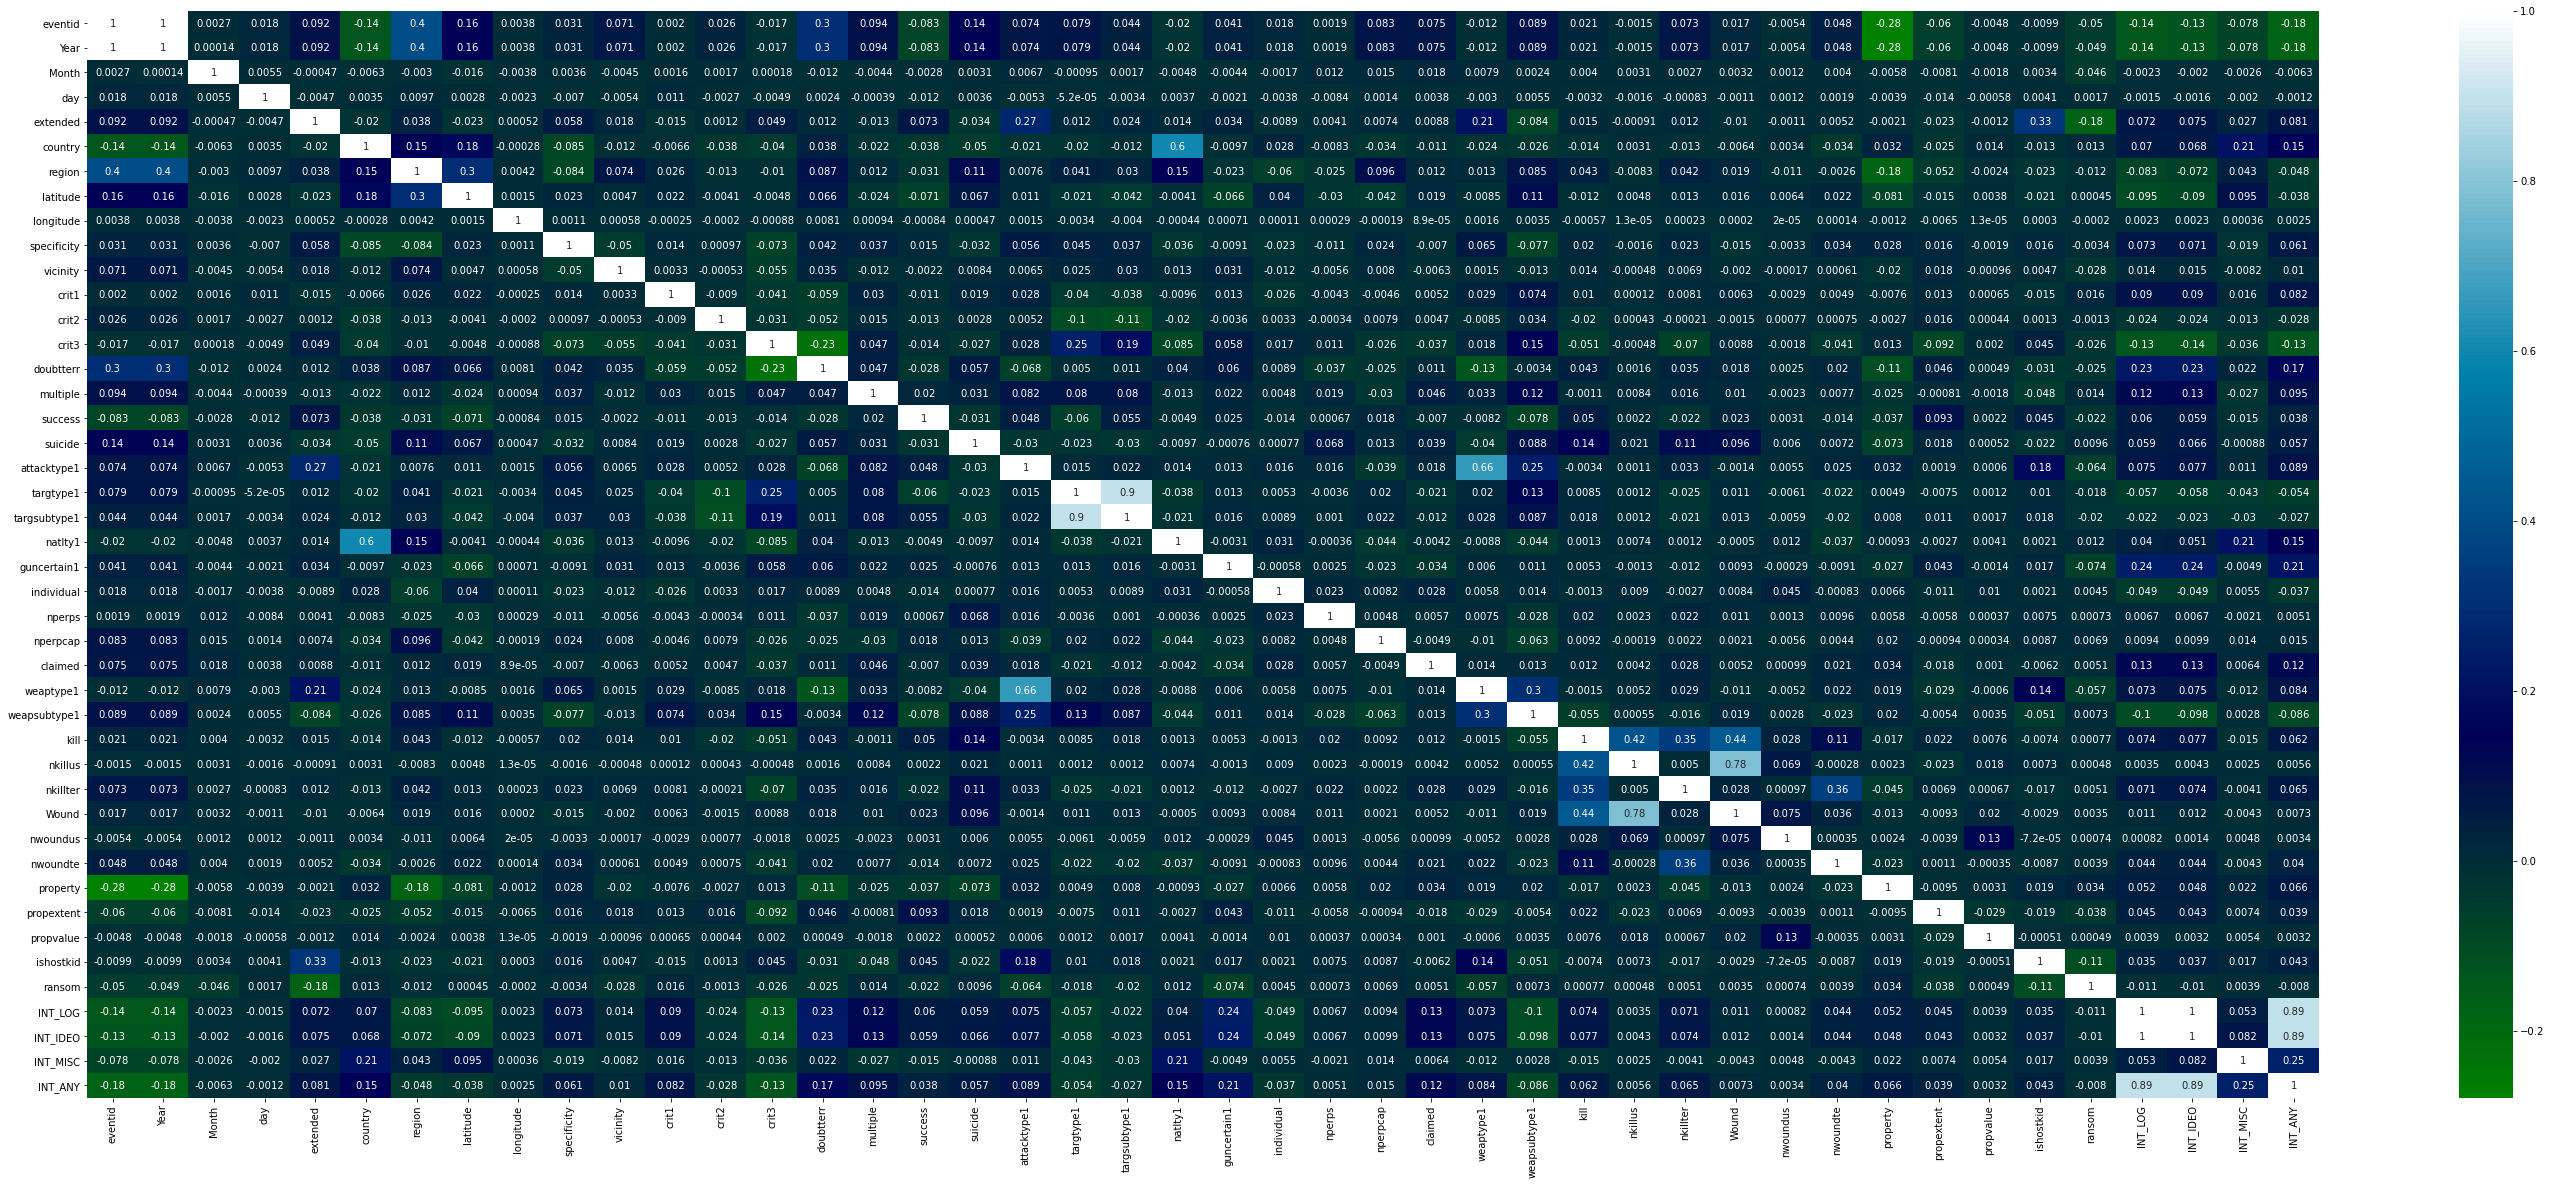

In [52]:
plt.figure(figsize=(50,20))
sns.heatmap(terror.corr(),annot=True,cmap='ocean')
plt.show()

#### A heatmap is plotted for checking correlation between variables.if the color is green shade, then the correlation is very low. If color is Dark Blue then the correlation is in the range 0.2-0.4, as the blue shade goes lighther the correlation between the variables increase. So ligther the shade, more the correlation.

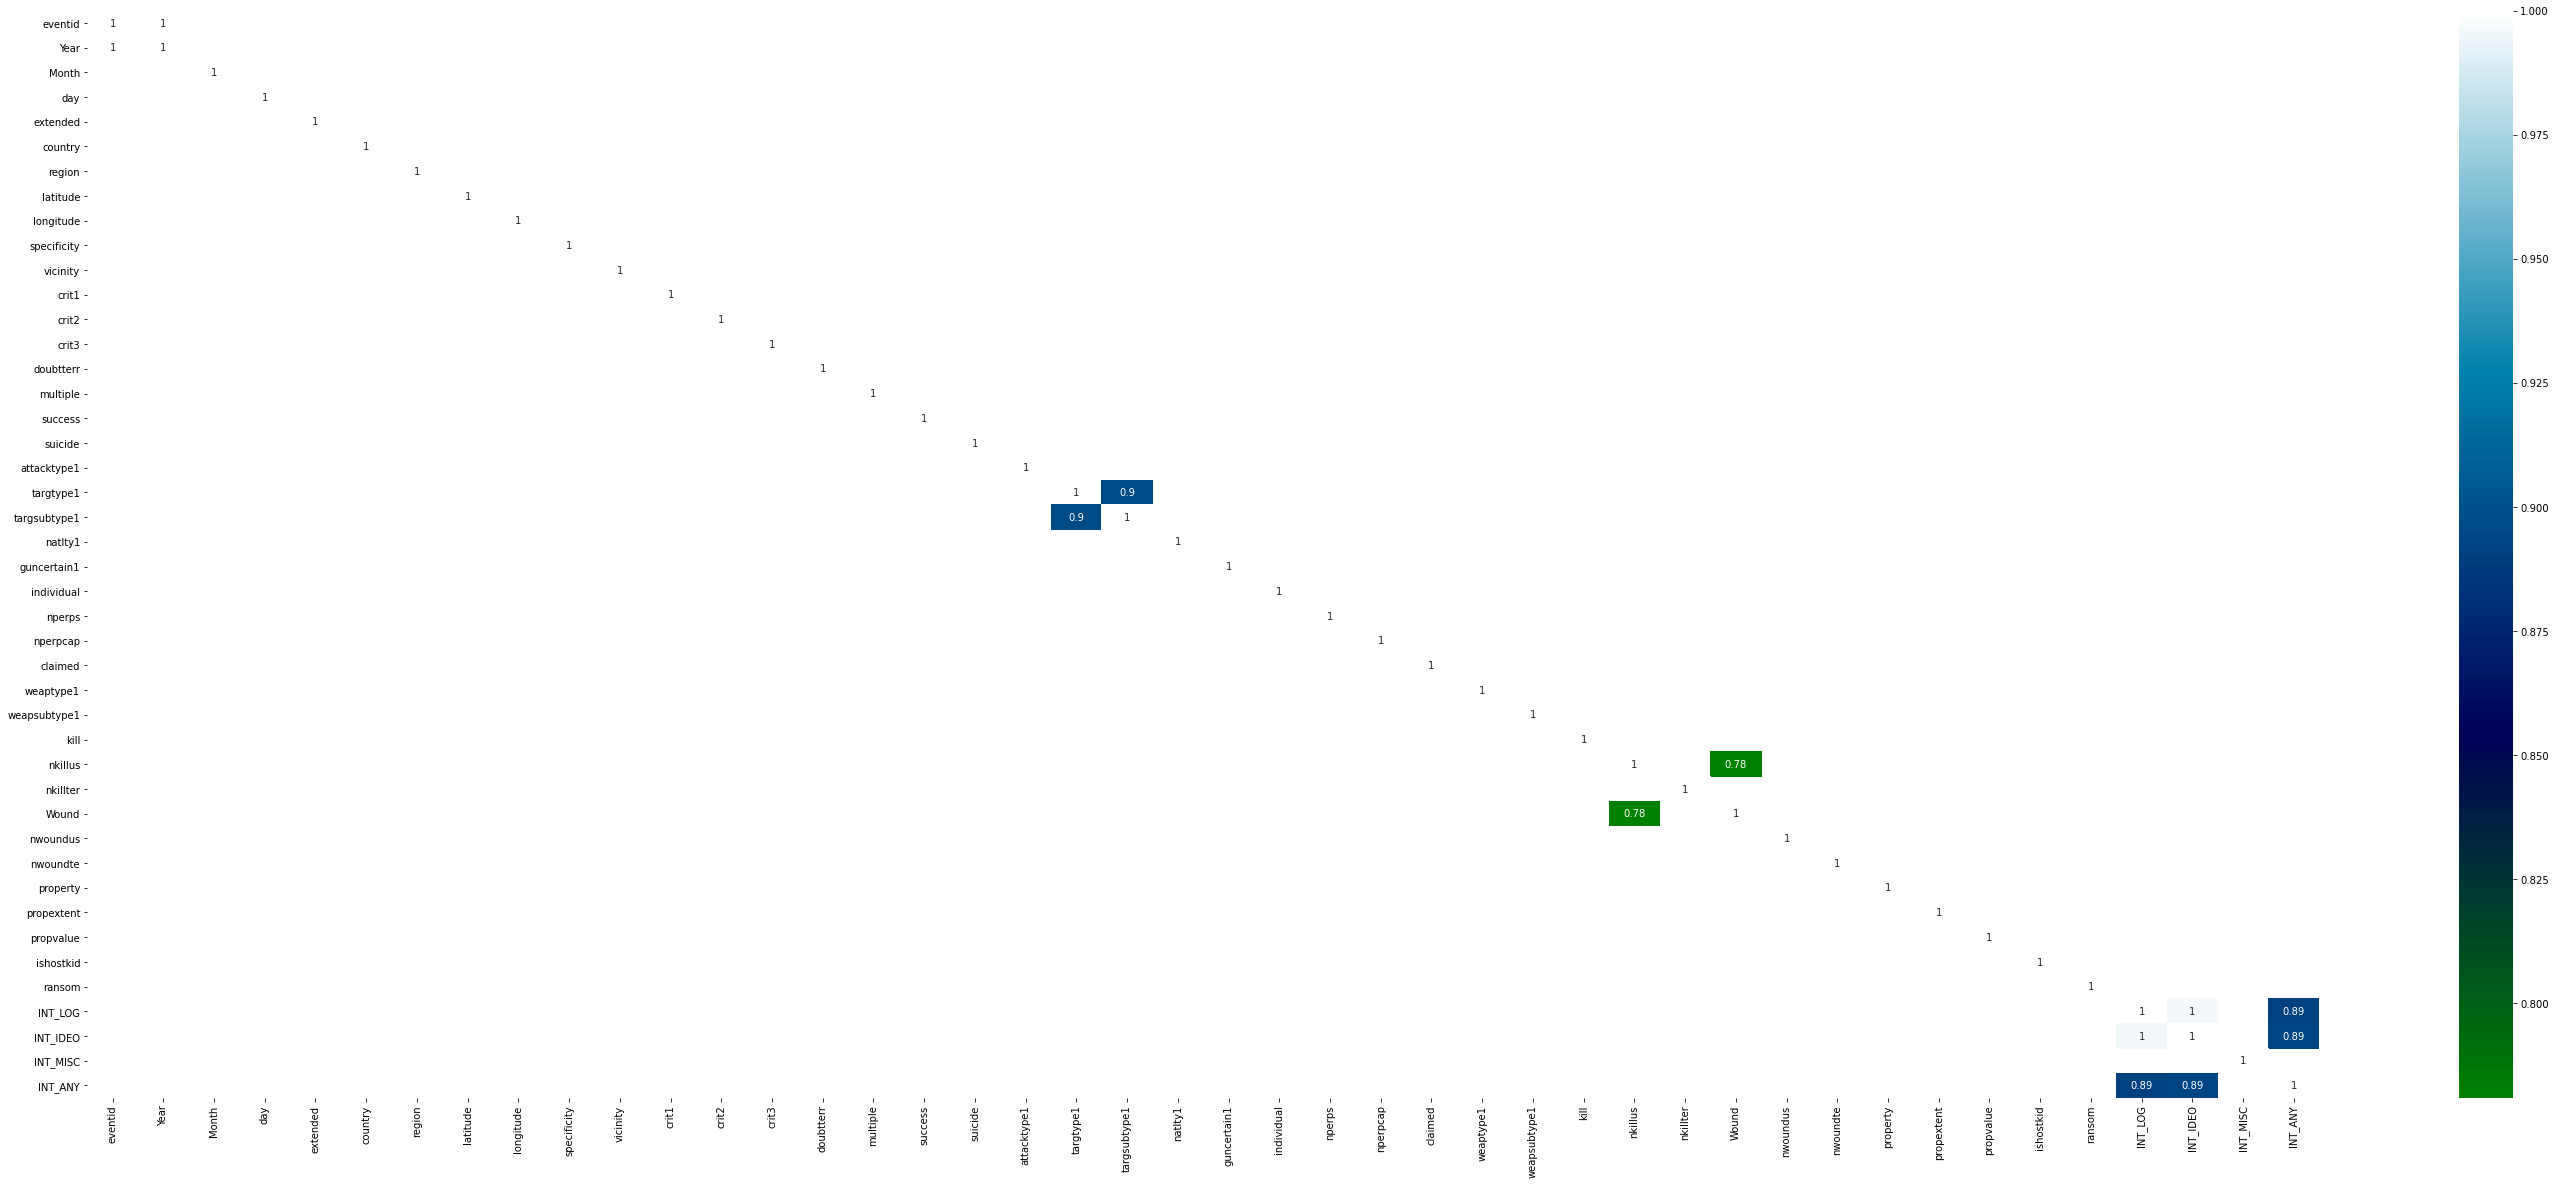

In [53]:
plt.figure(figsize=(50,20))
sns.heatmap(terror.corr()[terror.corr()>0.7],annot=True,cmap='ocean')
plt.show()

#### There are 2-3 variables which are correlated to each other

### Number of people killed each year

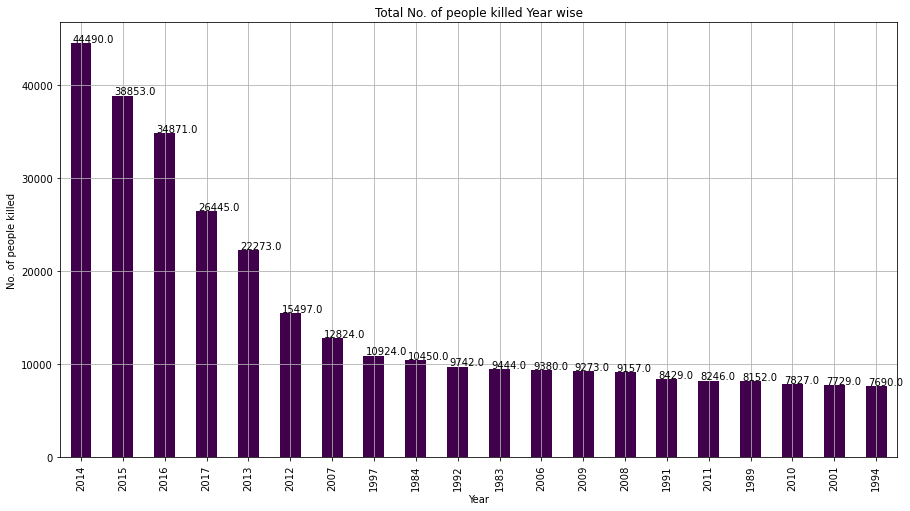

In [54]:
ax = terror.groupby(['Year'])['kill'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar', colormap = 'PRGn')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=90) 
plt.title('Total No. of people killed Year wise')
plt.xlabel('Year')
plt.ylabel("No. of people killed") 
plt.grid()
plt.show()

#### The above plot shows the total number of people killed each year, we can see that there were around 44,490 people killed in the year 2014 which records the most number of deaths.

### Total number of Attacks in Each Country

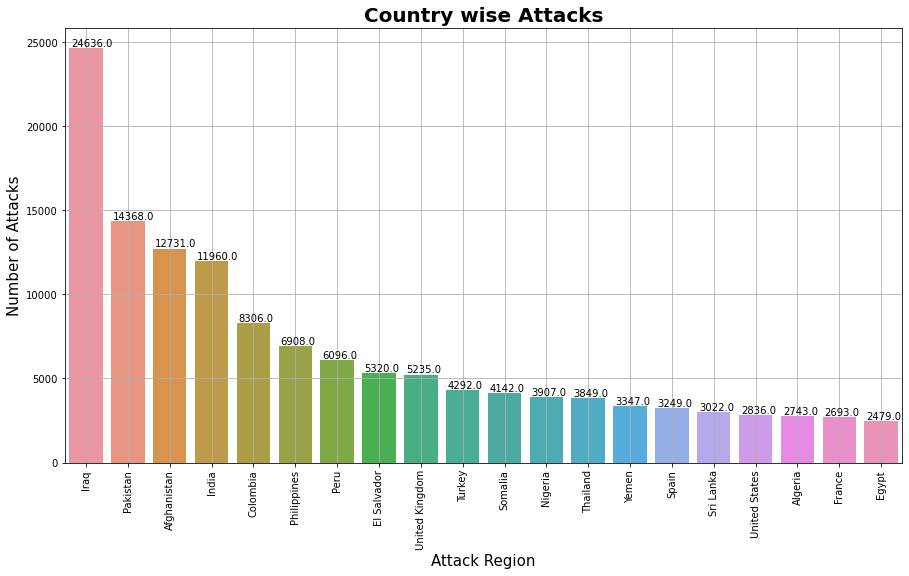

In [55]:
ax = sns.barplot(x = terror["Country"].value_counts()[:20].index, y=terror["Country"].value_counts()[:20].values)
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.ylabel("Number of Attacks", fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=15)
plt.title("Country wise Attacks", size=20, fontweight="bold")
plt.grid()
plt.show()

#### From the above plot, we can infer that Iraq has the most number of attacks with 24636 number of attacks in total.

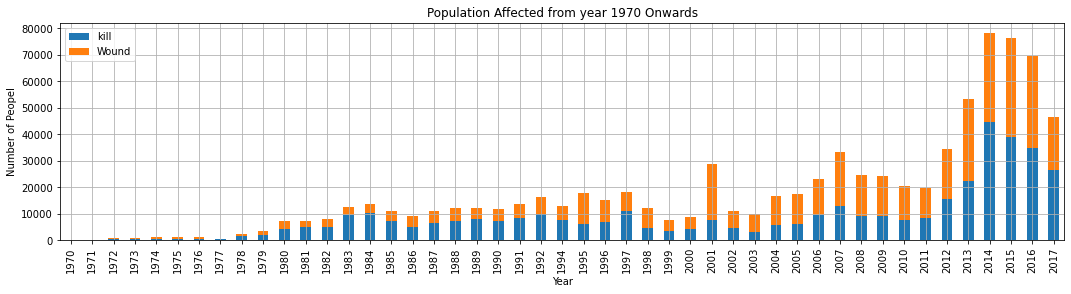

In [56]:
#Total people Affected from year 1970 to 2017 [Stacked bar plot]
y1970=terror[terror['kill']>0][['Year','kill','Wound']]
y1970.dropna()
y1970=y1970.groupby(['Year'])[['kill','Wound']].sum()

y1970.plot(kind='bar',stacked=True,figsize=(18,4))
plt.title('Population Affected from year 1970 Onwards')
plt.ylabel('Number of Peopel')
plt.grid()
plt.show()

#### we can see that from the years 2014-2017 there were most of them who were either killed or wounded. However, in the inital years of our dataset from 1970-1982, there are not many people affected during this phase(less than 10000).

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


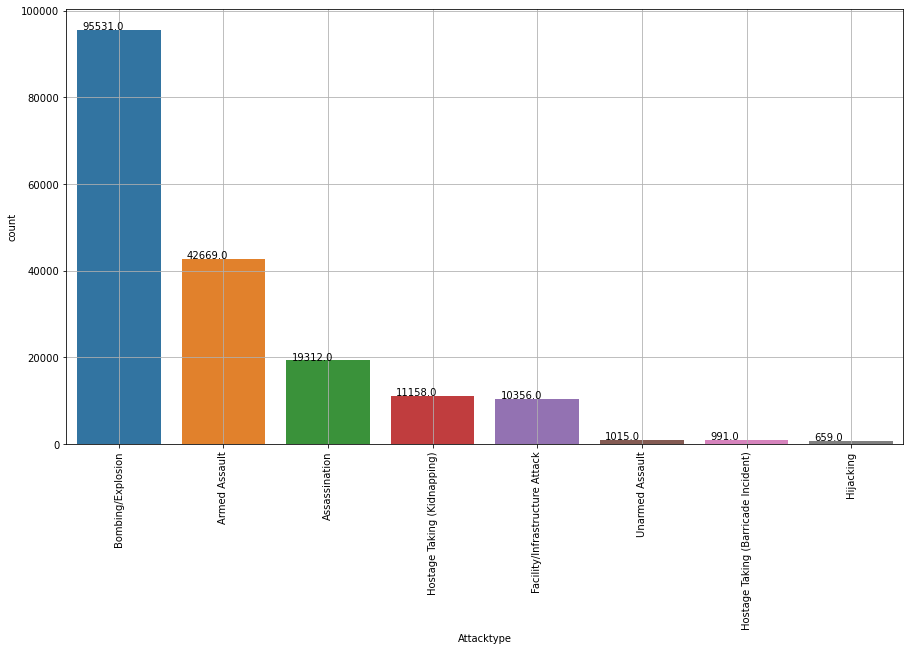

In [57]:
count = terror['Attacktype'].value_counts()
#plt.pie(count,autopct="%1.1f%%")
ax = sns.countplot(terror['Attacktype'],order = count.index)
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### From the above plot, we can infer that Bombing/Explosion is the most widely used attack type for terrorism.

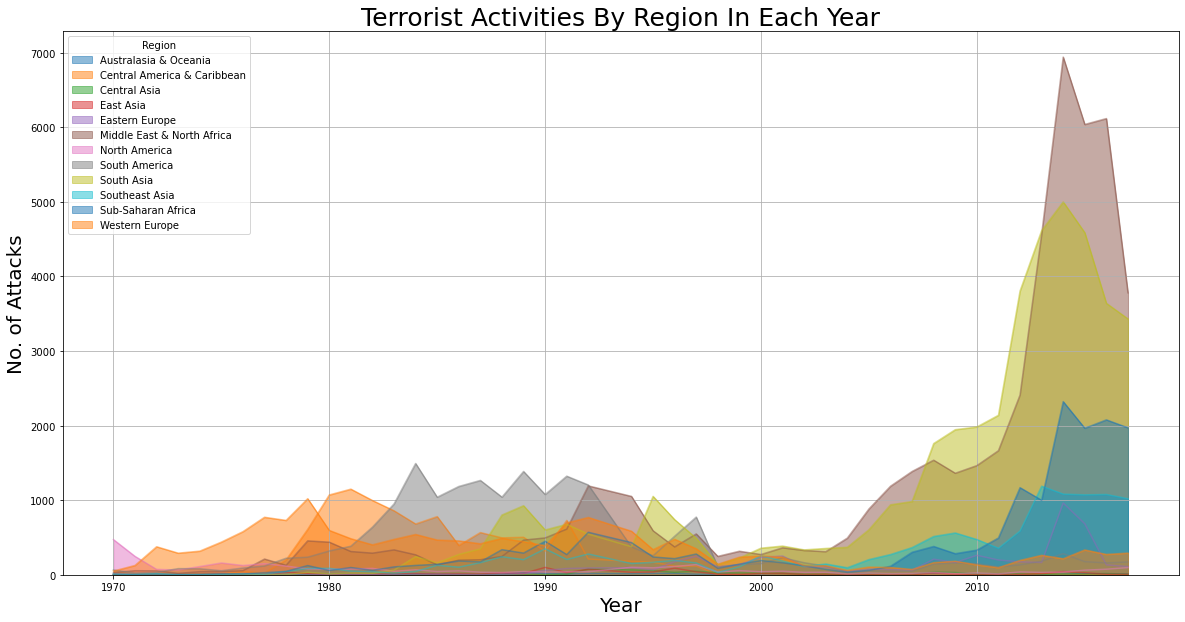

In [58]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('No. of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.grid()
plt.show()

#### from the above area plot, we can see that Middle East and North Africa region accounted for most number of attacks after 2010. This region is followed by South Asia during the same period of time.

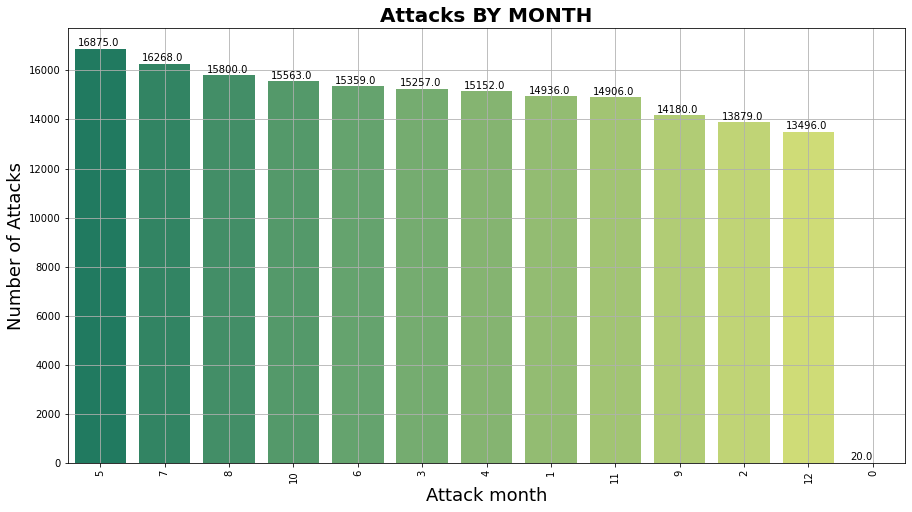

In [59]:
ax = sns.barplot(x = terror["Month"].value_counts()[:20].index, y=terror["Month"].value_counts()[:20].values
                ,order = terror['Month'].value_counts().index,palette='summer')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack month", fontsize=18)
plt.title(" Attacks BY MONTH ", size=20, fontweight="bold")
plt.grid()
plt.show()

#### From the above plot we can infer that, mostly there are most number of attacks in the month of May which has around 16875 attacks in total. This is followed by July which has around 16268 number of attacks in total.Comparitevely, there are less number of attacks in the month of December.

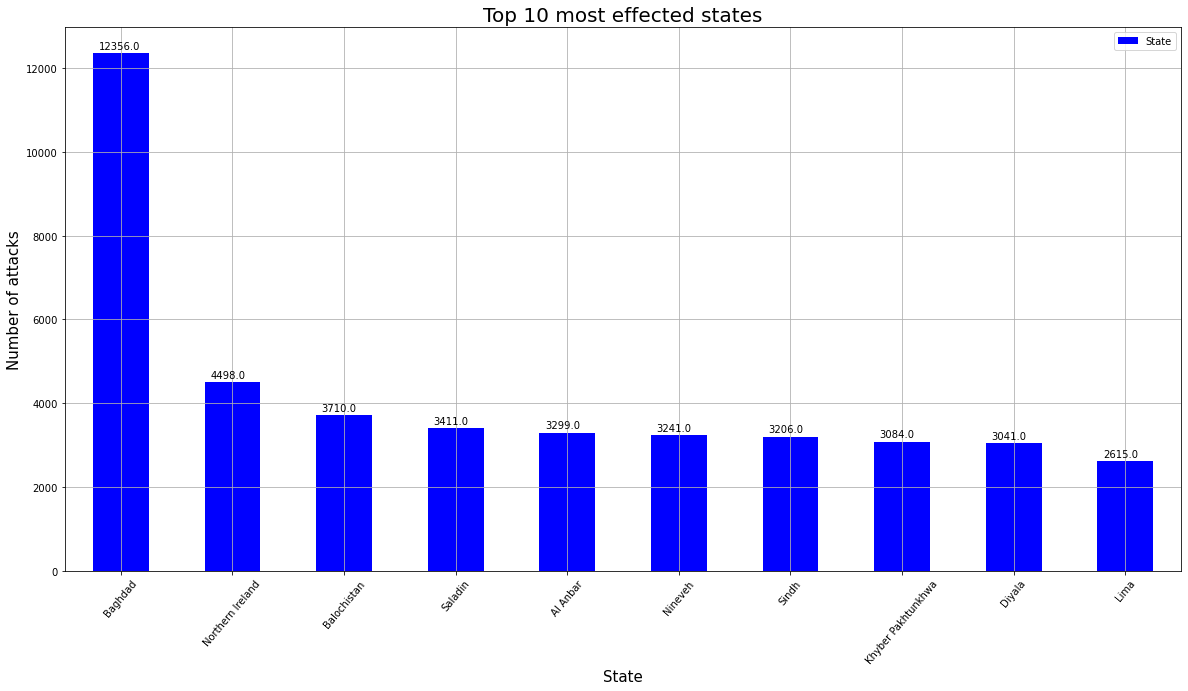

In [60]:
ax = terror['State'].value_counts().to_frame().sort_values('State',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation = 50)
plt.xlabel("State",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most effected states",fontsize=20)
plt.grid()
plt.show()

#### From the above plot we can infer that, Baghdad has most number of attacks as compared with other states. It has around 12356 number of attacks while the second highest has around 4498 number of attacks. Hence we can say that Baghdad State is the most affected state

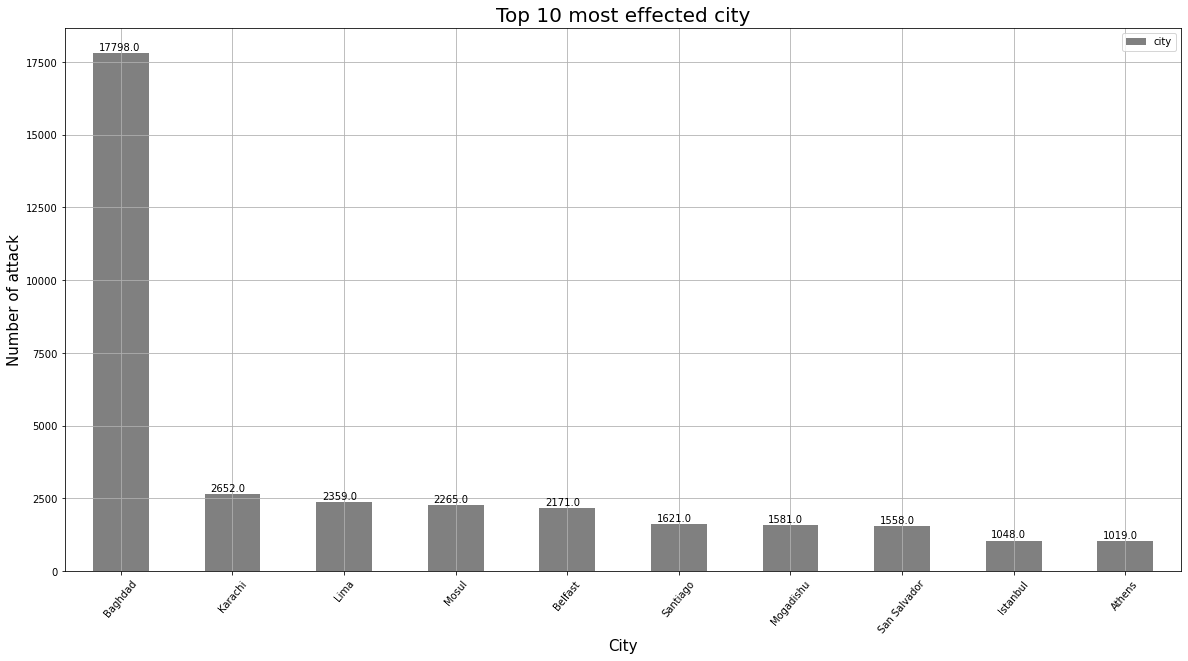

In [61]:
ax = terror['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='gray')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.grid()
plt.show()

#### From the above plot we can infer that, Baghdad has most number of attacks as compared with other cities. It has around 17798 number of attacks while the second highest has around 2652 number of attacks. Hence we can say that Baghdad State is the most affected City

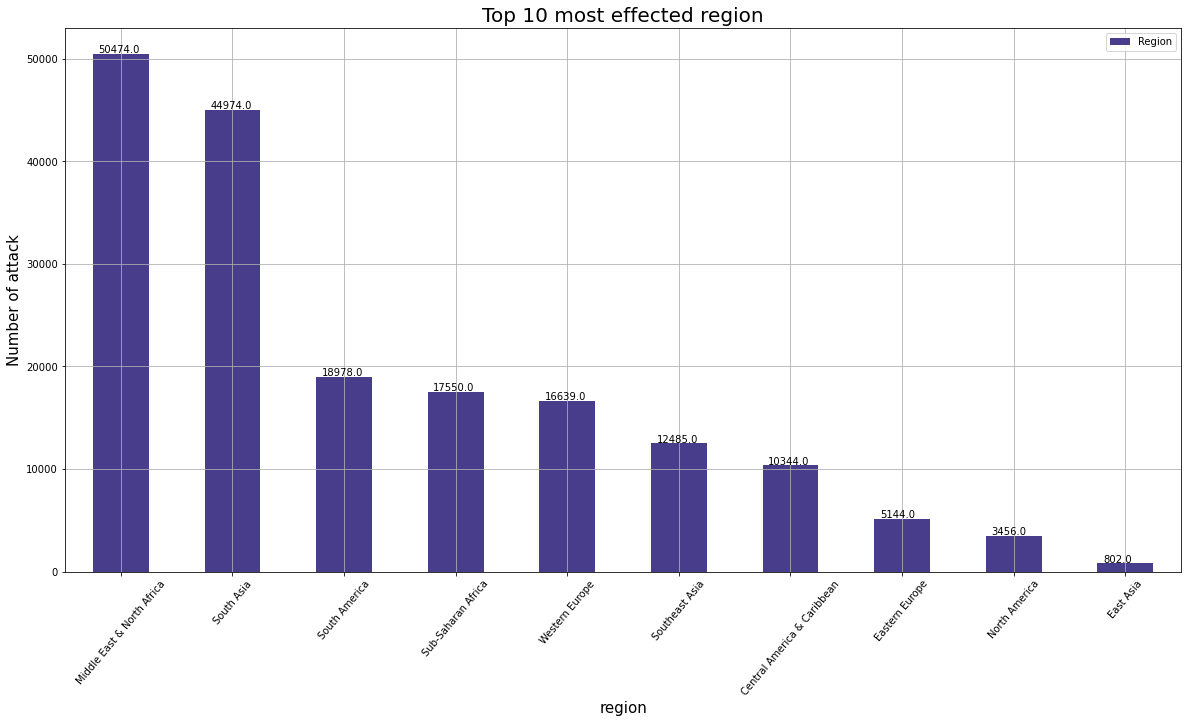

In [62]:
ax = terror['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='darkslateblue')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation = 50)
plt.xlabel("region",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected region",fontsize=20)
plt.grid()
plt.show()

#### from the above area plot, we can see that Middle East and North Africa region accounted for most number of attacks that is 50474. This region is followed by South Asia with 44974 number of attacks.

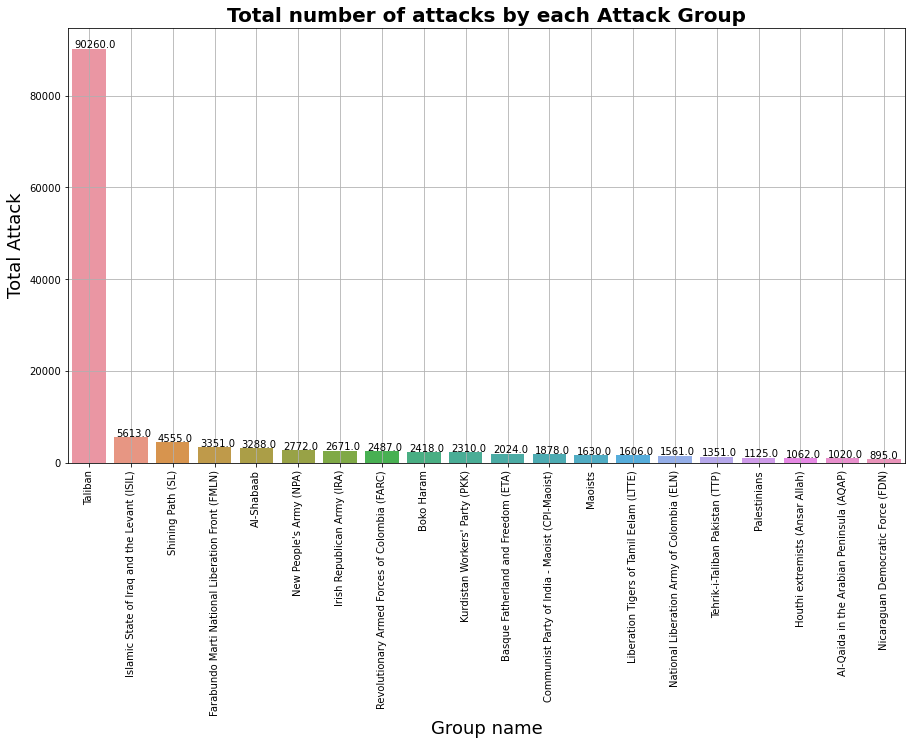

In [63]:
ax = sns.barplot(x = terror["Group"].value_counts()[:20].index, y=terror["Group"].value_counts()[:20].values)
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Group name", fontsize=18)
plt.title("Total number of attacks by each Attack Group", size=20, fontweight="bold")
plt.grid()
plt.show()

#### from the above barplot, we can clearly say that Taliban is the terrorism group that is performing most number of attacks which has done around 90260 number of attacks while the second most is Islamic State of Iraq and the levant group with 5613 number of attacks.

In [64]:
df=terror[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).reset_index().head(10)
df

,Group,Country,kill
0,Taliban,Iraq,38560.0
1,Taliban,Afghanistan,36667.0
2,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
3,Boko Haram,Nigeria,16917.0
4,Taliban,Pakistan,12161.0
5,Shining Path (SL),Peru,11595.0
6,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
7,Al-Shabaab,Somalia,8176.0
8,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
9,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0


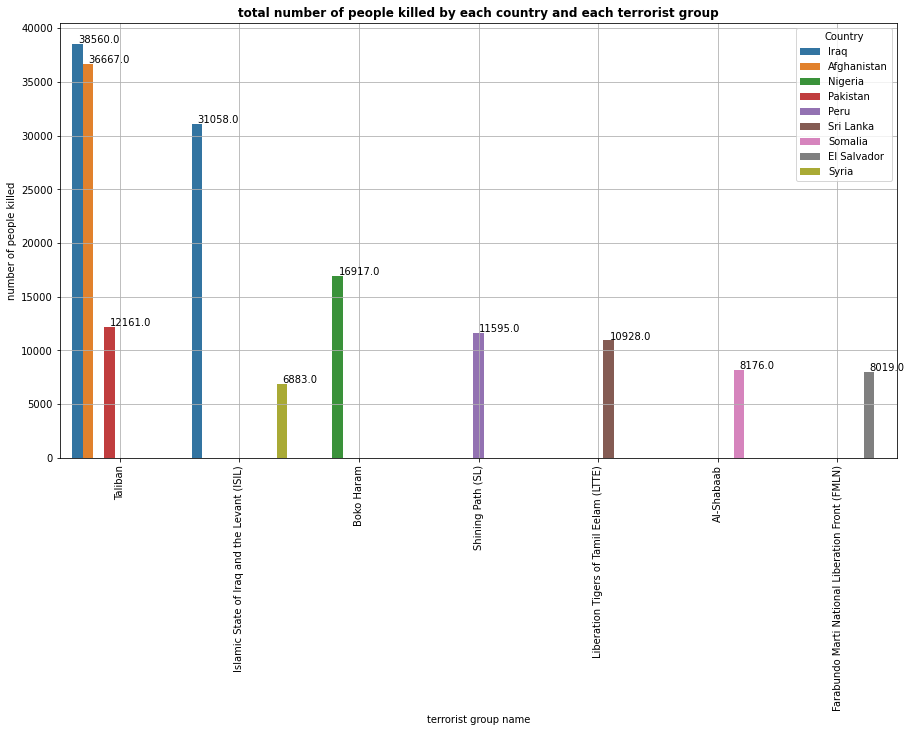

In [66]:
ax = sns.barplot(x = 'Group',y = 'kill',hue='Country',data = df)
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=90)
plt.xlabel('terrorist group name')
plt.ylabel('number of people killed')
plt.title('total number of people killed by each country and each terrorist group', fontweight="bold")
plt.grid()
plt.show()

#### from the above plot, we can say that taliban has performed most number of attacks on Iraq, Afganisthan and Pakistan

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


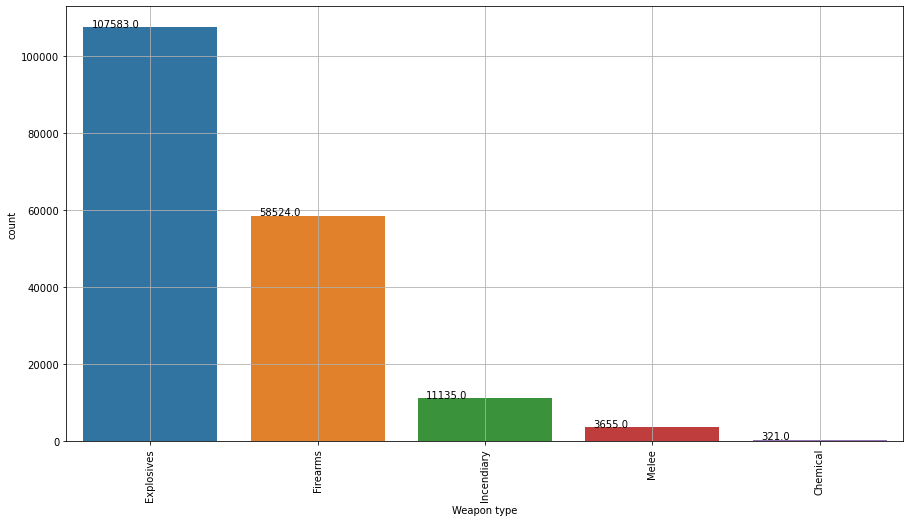

In [67]:
count = terror['Weapon'].value_counts()[:5]
ax = sns.countplot(terror['Weapon'],order = count.index)
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=90)
plt.xlabel('Weapon type')
plt.grid()
plt.show()

#### From the above plot it is quite evident that explosives was mostly used as a weapon for attacking which was followed by Firearms.Chemicals were rarely used to attack.

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


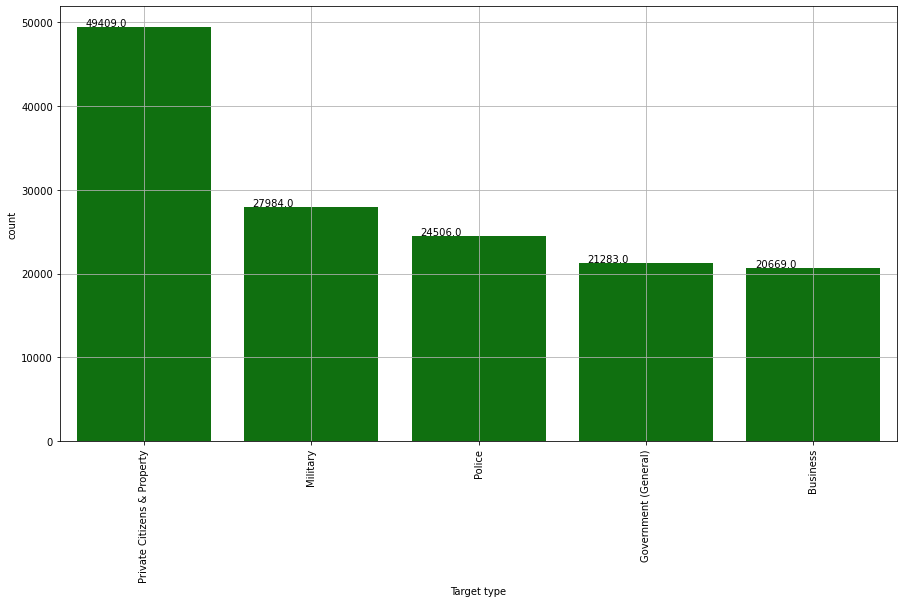

In [68]:
count = terror['Target_type'].value_counts()[:5]
ax = sns.countplot(terror['Target_type'],order = count.index,color='green')
for p in ax.patches:                 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=90)
plt.xlabel('Target type')
plt.grid()
plt.show()

#### From the above plot it is quite evident that the terrorists targeted mostly Private citizens and Property type, followed by Military group

In [69]:
countryKill = terror.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Conclusion :
 -we found that hot zone for terrorism is Iraq.
 
-Baghdad state and city has the most number of terrorist attacks.

-2014 is the year which accounted for most number of terrorist attacks.

-explosives was used as a weapon for terrorism.

-Taliban group has done the most number of attacks.

-Private Citizens and Properties were the most targeted type for terrorism.

-Afghanistan is the country were most of the people were killed due to terrorism.